# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [462]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker import plot_maker_3d

## 2. Importing Data

In [463]:
# get all the red ball data
X_butterfly_a = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_10h54m.csv', decimal='.', delimiter=',')
X_butterfly_b = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_10h56m.csv', decimal='.', delimiter=',')
X_hypo_a = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h02m.csv', decimal='.', delimiter=',')
X_hypo_b = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h05m.csv', decimal='.', delimiter=',')
X_lis_a = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h08m.csv', decimal='.', delimiter=',')
X_lis_b = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h09m.csv', decimal='.', delimiter=',')
X_cir_a = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h15m.csv', decimal='.', delimiter=',')
X_cir_b = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h16m.csv', decimal='.', delimiter=',')
X_spiro_a = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h21m.csv', decimal='.', delimiter=',')
X_spiro_b = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h22m.csv', decimal='.', delimiter=',')

In [464]:
# get all the position data and remove the last row
y_butterfly_a = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_10h54m.csv', decimal='.', delimiter=',').iloc[2:]
y_butterfly_b = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_10h56m.csv', decimal='.', delimiter=',').iloc[2:]
y_hypo_a = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h02m.csv', decimal='.', delimiter=',').iloc[2:]
y_hypo_b = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h05m.csv', decimal='.', delimiter=',').iloc[2:]
y_lis_a = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h08m.csv', decimal='.', delimiter=',').iloc[2:]
y_lis_b = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h09m.csv', decimal='.', delimiter=',').iloc[2:]
y_cir_a = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h15m.csv', decimal='.', delimiter=',').iloc[2:]
y_cir_b = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h16m.csv', decimal='.', delimiter=',').iloc[2:]
y_spiro_a = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h21m.csv', decimal='.', delimiter=',').iloc[2:]
y_spiro_b = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h22m.csv', decimal='.', delimiter=',').iloc[2:]

In [465]:
(X_butterfly_a.shape, y_butterfly_a.shape), (X_butterfly_b.shape, y_butterfly_b.shape), (X_hypo_a.shape, y_hypo_a.shape), (X_hypo_b.shape, y_hypo_b.shape), (X_lis_a.shape, y_lis_a.shape), (X_lis_b.shape, y_lis_b.shape), (X_cir_a.shape, y_cir_a.shape), (X_cir_b.shape, y_cir_b.shape), (X_spiro_a.shape, y_spiro_a.shape), (X_spiro_b.shape, y_spiro_b.shape)

(((1000, 14), (1000, 3)),
 ((1012, 14), (1012, 3)),
 ((1048, 14), (1048, 3)),
 ((1012, 14), (1012, 3)),
 ((1009, 14), (1009, 3)),
 ((1006, 14), (1006, 3)),
 ((998, 14), (998, 3)),
 ((1012, 14), (1012, 3)),
 ((1011, 14), (1011, 3)),
 ((1010, 14), (1010, 3)))

#### 2.1 Check for Missing Values in spriral_down_b and spiral_down_c

In [466]:
print(f'The amount of NaN values in X_butterfly_a: {X_butterfly_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_butterfly_b: {X_butterfly_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_a: {X_hypo_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_b: {X_hypo_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_lis_a: {X_lis_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_lis_b: {X_lis_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_cir_a: {X_cir_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_cir_b: {X_cir_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiro_a: {X_spiro_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiro_b: {X_spiro_b.isna().sum().sum()}')

The amount of NaN values in X_butterfly_a: 208
The amount of NaN values in X_butterfly_b: 498
The amount of NaN values in X_hypo_a: 2368
The amount of NaN values in X_hypo_b: 82
The amount of NaN values in X_lis_a: 4
The amount of NaN values in X_lis_b: 0
The amount of NaN values in X_cir_a: 6
The amount of NaN values in X_cir_b: 8
The amount of NaN values in X_spiro_a: 210
The amount of NaN values in X_spiro_b: 6


I Interpolated the files with a lot of missing values
All the results are quite good.

In [467]:
X_butterfly_a = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_10h54m_interpolated.csv', decimal='.', delimiter=',')
X_butterfly_b = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_10h56m_interpolated.csv', decimal='.', delimiter=',')    
X_hypo_a = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h02m_interpolated.csv', decimal='.', delimiter=',')
X_spiro_a = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h21m_interpolated.csv', decimal='.', delimiter=',')
X_butterfly_a.shape, X_butterfly_b.shape, X_hypo_a.shape, X_spiro_a.shape

((1000, 14), (1012, 14), (1048, 14), (1011, 14))

### 2.3 Combine all the datasets

In [468]:
X_train = pd.concat([X_butterfly_a, X_butterfly_b, X_hypo_a, X_hypo_b, X_lis_a, X_lis_b, X_cir_a, X_cir_b, X_spiro_a, X_spiro_b])
y_train = pd.concat([y_butterfly_a, y_butterfly_b, y_hypo_a, y_hypo_b, y_lis_a, y_lis_b, y_cir_a, y_cir_b, y_spiro_a, y_spiro_b])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [469]:
X_train.isna().sum()

u0     0
v0     0
u1     3
v1     3
u2    41
v2    41
u3     2
v3     2
u4     3
v4     3
u5     0
v5     0
u6     4
v6     4
dtype: int64

In [470]:
X_train.shape, y_train.shape

((10118, 14), (10118, 3))

In [471]:
combined = pd.concat([X_train, y_train], axis=1)

## 3. Data Preprocessing

In [472]:
combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,33.0,53.0,117.0,52.0,30.5,66.5,73.0,66.0,118.0,66.0,33.0,79.0,116.0,79.0,5.221511,3.206627,23.55491
1,31.0,53.0,114.5,52.0,29.0,66.0,71.5,66.0,117.0,66.0,31.0,79.0,115.0,79.5,5.335478,3.262649,23.29768
2,31.0,53.0,114.0,52.5,28.5,66.0,71.0,66.0,116.5,66.5,31.0,79.0,114.0,79.5,5.474411,3.205282,23.24795
3,29.5,52.5,113.5,52.5,28.0,66.0,70.0,66.0,115.0,66.0,29.0,79.0,113.5,79.5,5.766634,3.022361,23.31674
4,27.5,51.5,111.0,51.0,25.5,65.5,68.0,65.0,113.0,66.0,27.0,78.0,111.0,79.0,5.885469,3.167516,23.20120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10113,3.0,53.0,88.0,54.0,1.0,67.0,48.0,67.0,90.0,67.0,3.0,82.0,88.5,79.5,9.089105,3.550083,23.74895
10114,3.0,54.0,88.0,55.0,1.5,68.0,48.0,68.0,90.5,68.0,4.0,83.0,88.5,80.5,9.178788,3.418952,23.63023
10115,3.0,53.0,88.0,54.0,1.0,67.0,48.0,67.0,90.5,67.0,3.0,82.0,88.0,80.0,9.175811,3.643611,23.68478
10116,3.0,54.5,88.0,55.5,1.0,69.0,48.0,68.0,90.0,69.0,3.0,83.0,88.0,81.0,9.191278,3.612588,23.79458


In [473]:
# check for missing values
print(f'The data has missing values: {combined.isnull().sum().sum()}')
combined.dropna(inplace=True)
print(f'The data has missing values: {combined.isnull().sum().sum()}')

The data has missing values: 106
The data has missing values: 0


In [474]:
X = combined.iloc[:, :14]
y = combined.iloc[:, 14:]
X.to_csv('../data-noise-7/red_ball_all.csv', index=False)
y.to_csv('../data-noise-7/positions_all.csv', index=False)

In [475]:
X.shape, y.shape

((10066, 14), (10066, 3))

In [476]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [477]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [478]:
# Best parameters: {'mlp__solver': 'adam', 'mlp__max_iter': 28000, 'mlp__learning_rate_init': 0.01, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
model = MLPRegressor(random_state=42, max_iter=28000, learning_rate_init=0.01, learning_rate='adaptive', hidden_layer_sizes=(50, 100, 50), early_stopping=True, alpha=0.001, activation='relu')

param_grid = {
    'mlp__hidden_layer_sizes': 
        [(50, 100, 50) # ,(100,), (64, 32, 64)],
         ],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

#random_search.fit(X_scaled, y_scaled)

In [479]:
#print(f'Best parameters: {random_search.best_params_}')
#print(f'Best score: {random_search.best_score_}')

In [480]:
#model = random_search.best_estimator_

## 5. Training the Model

In [481]:
model.fit(X_scaled, y_scaled)

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(50, 100, 50),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=28000,
             random_state=42)

## 6. Make Predictions On Test Data

In [482]:
import pandas as pd

In [483]:
X_test_8_a = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h24m.csv', decimal='.', delimiter=',')
X_test_8_b = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h32m.csv', decimal='.', delimiter=',')

In [484]:
y_test_8_a = pd.read_csv('../data-7cam-10/data-8motion/positions_xyz_2024-03-12_22h40m.csv', decimal='.', delimiter=',').iloc[2:]
y_test_8_b = pd.read_csv('../data-7cam-10/data-8motion/positions_xyz_2024-03-12_22h41m.csv', decimal='.', delimiter=',').iloc[2:]

In [485]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    y_test_val = y_test_val.iloc[4:]
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :14]
    y_val = combined_test.iloc[:, 14:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [486]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

Mean Squared Error on Test Data Set: 3.485510122341258
Mean Absolute Error on Test Data Set: 1.46510429163345
R2 Score on Test Data set: -1.497115151562797


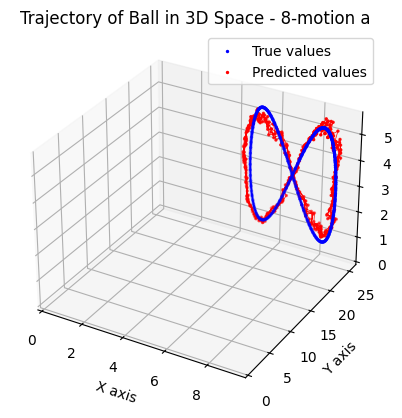

In [487]:
X_test_8_scaled_a, y_test_8_a = prepare_and_scale_test_data(X_test_8_a, y_test_8_a, scaler_x)
X_test_8_pred_a, mse_8_a, mae_8_a, r2_8_a = predict_evaluate_plot(X_test_8_scaled_a, y_test_8_a, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion a')

Mean Squared Error on Test Data Set: 2.8736549463376106
Mean Absolute Error on Test Data Set: 1.424082331530796
R2 Score on Test Data set: -0.8062119206169642


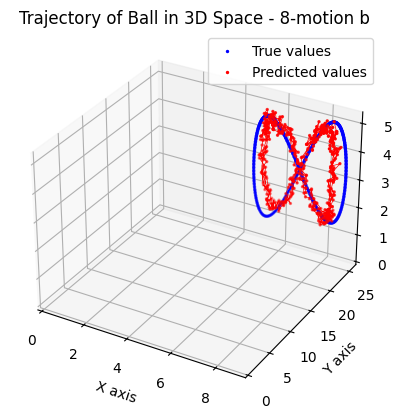

In [488]:
X_test_8_scaled_b, y_test_8_b = prepare_and_scale_test_data(X_test_8_b, y_test_8_b, scaler_x)
X_test_8_pred_b, mse_8_b, mae_8_b, r2_8_b = predict_evaluate_plot(X_test_8_scaled_b, y_test_8_b, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion b')